In [ ]:
import os
from dotenv import load_dotenv

load_dotenv()  # take environment variables from .env.

IBM_QUANTUM_API_TOKEN = os.getenv("IBM_QUANTUM_API_TOKEN") 
print(IBM_QUANTUM_API_TOKEN)

k3BDIBAWowLd-6P7VZDRe1sdrLtvXOhPrEvGa3YM6hus


In [15]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
QiskitRuntimeService.save_account(
  token=IBM_QUANTUM_API_TOKEN,
  instance="qia",
  overwrite=True
)

In [16]:
# Load saved credentials
service = QiskitRuntimeService()

job id: d1o9ds76d0hc73b6rkg0
PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-07-11 04:45:38', stop='2025-07-11 04:45:46', size=4096>)])}, 'version': 2})


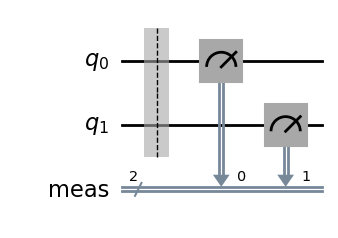

In [17]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
 
# Create empty circuit
example_circuit = QuantumCircuit(2)
example_circuit.measure_all()
 
# You'll need to specify the credentials when initializing QiskitRuntimeService, if they were not previously saved.
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)
 
sampler = Sampler(backend)
job = sampler.run([example_circuit])
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

# Visualize the circuit

example_circuit.draw('mpl')